In [ ]:
logistic regression
SVM
Decision Tree
Random Forest
XGBoost

In [265]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [266]:
df = pd.read_csv('pima_indians_diabetes.csv')
df.head(5)

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [267]:
X = df.drop('class', axis=1)
y = df['class']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [269]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_imputed)

X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)

In [270]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [271]:
predictions = rf.predict(X_test_scaled)

In [272]:
importances = rf.feature_importances_
feature_names = X.columns

In [273]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

<Axes: >

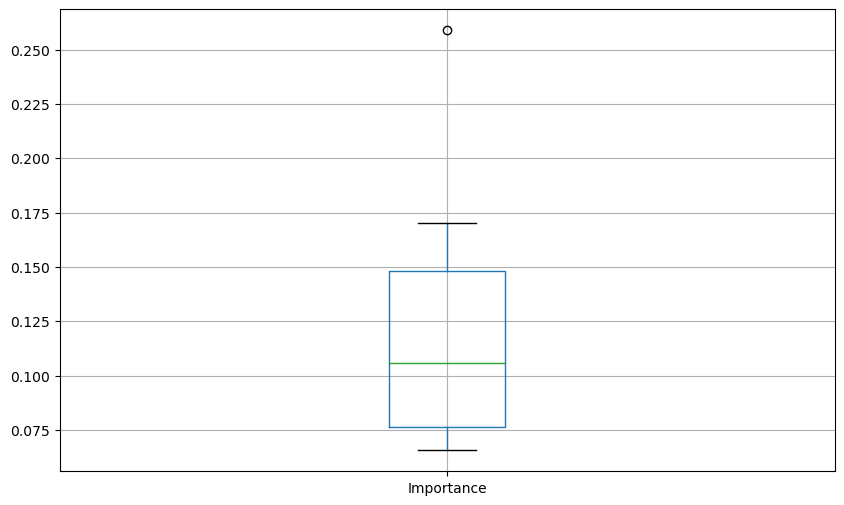

In [274]:
importance_df.boxplot()

In [275]:
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
1,plasma_concentration,0.258864
5,bmi,0.169984
7,age,0.140931
6,diabetes_pedigree,0.123768
2,diastolic_blood_pressure,0.088134
0,time_pregnant_no,0.076551
4,serum_insulin,0.076122
3,triceps_skinfold_thickness,0.065646


In [276]:
df = df.drop(importance_df.iloc[-1][0], axis=1)

In [277]:
X = df.drop('class', axis=1)
y = df['class']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_imputed)

X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)

In [280]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [281]:
predictions = rf.predict(X_test_scaled)

In [282]:
importances = rf.feature_importances_
feature_names = X.columns

In [283]:
importance_df2 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_names

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'serum_insulin', 'bmi', 'diabetes_pedigree', 'age'],
      dtype='object')

<Axes: >

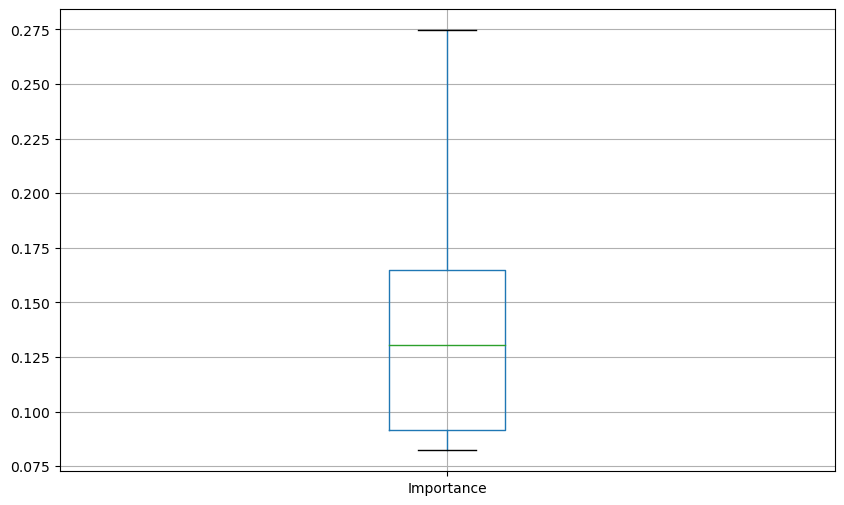

In [284]:
importance_df2.boxplot()

In [285]:
importance_df2.sort_values('Importance', ascending=False)

,Feature,Importance
1,plasma_concentration,0.274617
4,bmi,0.177994
6,age,0.151941
5,diabetes_pedigree,0.130471
2,diastolic_blood_pressure,0.099065
3,serum_insulin,0.083658
0,time_pregnant_no,0.082253
